# INSTABOT PART 2

### (LOGIN FUNCTION) we willl need these two function to perform further

In [67]:
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup as bs
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import chromedriver_autoinstaller

chromedriver_autoinstaller.install()
sample_username = 'USER_NAME'
sample_psw = 'PASSWORD'
driver = webdriver.Chrome()

def login(sample_user, sample_pswd, driver):
    driver.get("https://instagram.com")
    time.sleep(3)
    driver.maximize_window()
    
    user = driver.find_elements(By.XPATH, '//input[contains(@class, "_aa4b _add6 _ac4d")]')[0]
    psw = driver.find_elements(By.XPATH, '//input[contains(@class, "_aa4b _add6 _ac4d")]')[1]
    
    user.send_keys(sample_username)
    psw.send_keys(sample_psw)
    login = driver.find_element(By.XPATH, '//button[contains(@class, "_acan _acap _acas _aj1-")]')
    login.click()

login(sample_username, sample_psw, driver)

### (SEARCH FOOD)

In [10]:
def search(query, driver):
    srch_button = driver.find_elements(By.CLASS_NAME, '_ab6-')[2]
    srch_button.click()
    srch_text = driver.find_element(By.XPATH, '//div//input[@aria-label="Search input"]')
    srch_text.send_keys(query) 
    time.sleep(4)
    # Extracting all ig handles that comes when we search food or any query
    all_ig_handle = driver.find_elements(By.XPATH, '//div[contains(@class, "x9f619 xjbqb8w x78zum5 x168nmei x13lgxp2 x5pf9jr xo71vjh x1uhb9sk x1plvlek xryxfnj x1c4vz4f x2lah0s x1q0g3np xqjyukv x6s0dn4 x1oa3qoh x1nhvcw1")]')
    users_names = []
    #printing all ig handles
    for user in all_ig_handle:
        handle_name = user.find_element(By.TAG_NAME, 'span').text
        if handle_name != "":
            users_names.append(handle_name)
    driver.find_elements(By.CLASS_NAME, "_ab6-")[1].click()
    return users_names

query = 'food'
print(search(query, driver))

['food_tour_ent', 'bhopalfoodwalks', 'bhopalfoodlovers', 'indian_tasty_food', 'streetfoodbhopal', 'indore_streetfood', 'food', 'travelbitess', '_foodie.af_', 'bhopalfoodgram', 'foodenza_bhopal', 'food_street_indore', 'indori_foodiess', 'bhopalifoodguru', 'chocoheaven_deeply_divine', 'bhopali_foodies_', 'food_vlogs_and_recipes', 'food_blog_bhopal', 'foodpharmer', 'maldives.explores', 'china.travels', 'kawalpreet_kaur_kalsi', '__vaishali_sharma', 'usa.explores', 'explorer_bhaiya', 'roamingferalcat', 'bhookh_bakar_baithak', '_food.is.good._', 'ganeshamfastfoodbhopal', 'dietitiandeanna', '__food.fanatic__', 'indorefooddelicacy', 'rays.indorefoodcourt', 'food_unlock_official', 'japan.explores', 'thailand.explores', 'indorefoodexplorer', 'foodtemptationsbhopal', 'miami.explorers', 'paragbakery_and_fast_food', 'foodie_batra', 'chai_ke_aashik', 'foodie_traveler___', 'food_prismmm', 'ishita_neema', 'utsahfood', 'indori_food_rider', 'foodiliciouscravings', 'sweettweapon_']


### OPENING PROFILE OF ANY SEARCH QUERY

In [77]:
def search_user(query, driver):
    
    srch_button = driver.find_elements(By.CLASS_NAME, '_ab6-')[2]
    srch_button.click()
    WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.XPATH,
                                                    '//div[contains(@class, "_aaw6")]')))
    time.sleep(3)
    
    srch_text = driver.find_element(By.XPATH, '//div//input[@aria-label="Search input"]')
    srch_text.send_keys(query)
    
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, f'//span[text()="{query}"]')))
    
    driver.find_element(By.XPATH, f'//span[text()="{query}"]').click()
    
search_user("sodelhi", driver)

# INSTABOT PART 2

### FIRST TASK (ANALYZE BEHAVIOR OF BLOGGERS)

In [2]:
login(sample_username, sample_psw, driver)

In [20]:
first_10 = search('food', driver)[:10] # actually if i takes first 10 then there is not much user handles, so im first searching all handles
# after searching all handles i will arrange it on descending order of their followers. and take out top 5 after that

In [21]:
first_10

['food_tour_ent',
 'bhopalfoodwalks',
 'bhopalfoodlovers',
 'indian_tasty_food',
 'streetfoodbhopal',
 'indore_streetfood',
 'food',
 'travelbitess',
 '_foodie.af_',
 'bhopalfoodgram']

In [26]:
user_followers = {}
def extract_followers_num(driver, all_handles):
    for query in all_handles:
        search_user(query, driver)
        WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.XPATH, '//ul[contains(@class, "x78zum5 x1q0g3np xieb3on")]')))

        html = driver.find_elements(By.XPATH, '//ul[contains(@class, "x78zum5 x1q0g3np xieb3on")]/li')[1].get_attribute('innerHTML')
        data = bs(html, "html.parser")
        follower_num = int(data.find('span')['title'].replace(',',""))

        user_followers[query] = follower_num
        
        home_btn = driver.find_element(By.CLASS_NAME, "_ab6-")
        home_btn.click()
        time.sleep(4)

    return user_followers

In [27]:
# extract_followers_num(driver, first_10)

In [28]:
followers_count = extract_followers_num(driver,first_10)

In [30]:
followers_count = dict(sorted(followers_count.items(), key=lambda item: item[1], reverse = True)[:5])

In [31]:
followers_count # THESE ARE THE TOP 5 HANDLES WHICH HAVE MOST NUMBER OF FOLLOWERS IN DESCENDING ORDER

{'food': 182580,
 'bhopalfoodwalks': 30202,
 'indian_tasty_food': 18907,
 '_foodie.af_': 14931,
 'travelbitess': 12632}

In [32]:
# Now we will find the number of posts they have did in previous 3 days
import datetime
today_date = datetime.date.today()
_3_days_ago = today_date-datetime.timedelta(days = 3)

In [33]:
_3_days_ago

datetime.date(2023, 6, 22)

In [293]:
# so we will compare if the date in post is greater than the _3_days_ago date

In [35]:
posts_date = driver.find_element(By.CLASS_NAME, "_aaqe").get_attribute('title')

In [36]:
# Now i will convert this date into datetime object
date_object = datetime.datetime.strptime(posts_date, "%b %d, %Y").date()
date_object

datetime.date(2022, 3, 9)

In [42]:
def extract_posts_count(driver, users):
    posts_count = {}
    for user in users:
        posts_count[user] = 0
        search_user(user, driver)
        time.sleep(3)
        WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.XPATH, '//div[contains(@class, "_ac7v  _al3n")]')))
        driver.find_element(By.CLASS_NAME, '_aagu').click()

        current_date = datetime.date.today()
        _3_days_ago = current_date-datetime.timedelta(days = 3)
        time.sleep(2)
        posts_date = driver.find_element(By.CLASS_NAME, "_aaqe").get_attribute('title')
        date_object = datetime.datetime.strptime(posts_date, "%b %d, %Y").date()

        while date_object>=_3_days_ago:
            if date_object == current_date:
                WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.XPATH,
                    '//button[contains(@class, "_abl-")]//*[@aria-label="Next"]'))).click()
                time.sleep(2)
                posts_date = driver.find_element(By.CLASS_NAME, "_aaqe").get_attribute('title')
                date_object = datetime.datetime.strptime(posts_date, "%b %d, %Y").date()
            elif user in posts_count:
                posts_count[user]+=1
                WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.XPATH,
                    '//button[contains(@class, "_abl-")]//*[@aria-label="Next"]'))).click()
                time.sleep(2)
                posts_date = driver.find_element(By.CLASS_NAME, "_aaqe").get_attribute('title')
                date_object = datetime.datetime.strptime(posts_date, "%b %d, %Y").date()

            else:
                posts_count[user] = 1
                WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.XPATH,
                    '//button[contains(@class, "_abl-")]//*[@aria-label="Next"]'))).click()
                time.sleep(2)
                posts_date = driver.find_element(By.CLASS_NAME, "_aaqe").get_attribute('title')
                date_object = datetime.datetime.strptime(posts_date, "%b %d, %Y").date()
        driver.back()
        driver.back()

    WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.XPATH, '//div//span[text() = "Home"]'))).click()
    return posts_count

users = []
for x in followers_count.keys():
    users.append(x)

In [43]:
posts_count = extract_posts_count(driver,users)

In [44]:
posts_count

{'food': 2,
 'bhopalfoodwalks': 0,
 'indian_tasty_food': 0,
 '_foodie.af_': 0,
 'travelbitess': 0}

#### Plotting graph of handles vs number of followers

In [45]:
import matplotlib.pyplot as plt

In [46]:
users = list(followers_count.keys())
followers = list(followers_count.values())

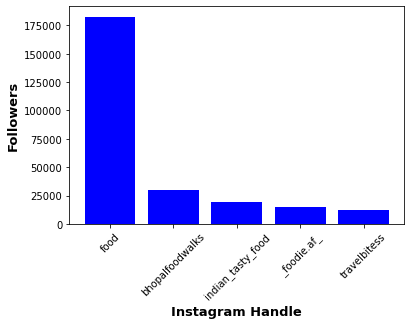

In [47]:
plt.bar(users,followers, color = 'blue')
plt.xticks(rotation = 45)
plt.xlabel("Instagram Handle",fontweight = "bold", size = 13)
plt.ylabel("Followers", fontweight = "bold", size = 13)
plt.show()

#### Plotting graph of instagram handle vs posts count

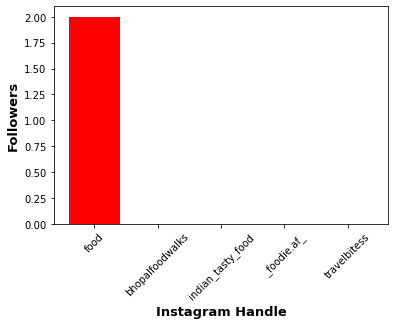

In [48]:
user_name = list(posts_count.keys())
post_count = list(posts_count.values())
plt.bar(user_name, post_count, color = 'red')
plt.xticks(rotation = 45) # Here the users haven't posted anything that's why some bars are not visible
plt.xlabel("Instagram Handle",fontweight = "bold", size = 13)
plt.ylabel("Followers", fontweight = "bold", size = 13)
plt.show()

### Second Task ( LIST OF HASHTAGS)

In [49]:
def extract_hash_tags(handle_names, driver):
    tags = {}
    for user in handle_names:
        search_user(user, driver)
        time.sleep(3)
        WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.XPATH, '//div[contains(@class, "_ac7v  _al3n")]')))
        driver.find_element(By.CLASS_NAME, '_aagu').click()
        
        for i in range(10):
            hash_tags = driver.find_elements(By.XPATH, '//a[contains(@class, "x1i10hfl xjbqb8w x6umtig x1b1mbwd xaqea5y xav7gou x9f619 x1ypdohk xt0psk2 xe8uvvx xdj266r x11i5rnm xat24cr x1mh8g0r xexx8yu x4uap5 x18d9i69 xkhd6sd x16tdsg8 x1hl2dhg xggy1nq x1a2a7pz  _aa9_ _a6hd")]')
            for tag in hash_tags:
                tag = tag.text.split("#")[1]
                if tag in tags:
                    tags[tag]+=1
                else:
                    tags[tag] = 1
            WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.XPATH,
                                            '//button[contains(@class, "_abl-")]//*[@aria-label="Next"]'))).click()
        driver.back()
        driver.back()
        
    return tags

In [50]:
all_hash_tags = extract_hash_tags(list(followers_count.keys()), driver)

In [51]:
len(all_hash_tags)

372

In [52]:
import pandas as pd

df = pd.DataFrame({"Word":list(all_hash_tags.keys()), "frequency":list(all_hash_tags.values())})
df = df.sort_values(by='frequency', ascending=False)

In [53]:
df.to_csv('Words.csv', index = False)

In [54]:
ans = df['Word'].to_list()[:5] # extracting top 5 hashtags
print(ans)

['bhopal', 'bhopalblogger', 'bhopalfoodblogger', 'bhopalfoodies', 'bhopalfoodwalk']


In [57]:
# SINCE THE QUESTION ASK ME TO FIND THE NUMBER OF TIMES THE HASHTAG HAS BEEN USED BY ALL 5 USER I HAVE TO AGAIN CHECK IT BY SCRAPING POSTS

def hash_tags_count(handle_names, driver, tags):
    hash_user_count = {}
    for user in handle_names:
        count = 0
        search_user(user, driver)
        time.sleep(4)
        WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.XPATH, '//div[contains(@class, "_ac7v  _al3n")]')))
        driver.find_element(By.CLASS_NAME, '_aagu').click()
        
        tags_lst = []
        for i in range(10):
            hash_tags = driver.find_elements(By.XPATH, '//a[contains(@class, "x1i10hfl xjbqb8w x6umtig x1b1mbwd xaqea5y xav7gou x9f619 x1ypdohk xt0psk2 xe8uvvx xdj266r x11i5rnm xat24cr x1mh8g0r xexx8yu x4uap5 x18d9i69 xkhd6sd x16tdsg8 x1hl2dhg xggy1nq x1a2a7pz  _aa9_ _a6hd")]')
            for tag in hash_tags:
                tag = tag.text.split("#")[1]
                tags_lst.append(tag)
            
            for pop_tag in tags:
                if pop_tag in tags_lst:
                    count+=tags_lst.count(pop_tag)
                    
            WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.XPATH,
                                            '//button[contains(@class, "_abl-")]//*[@aria-label="Next"]'))).click()
        hash_user_count[user] = count
        driver.back()
    return hash_user_count

In [59]:
hash_tag_count = hash_tags_count(list(followers_count.keys()), driver, ans)

In [60]:
tags_used_count = list(hash_tag_count.values())
user_handle = list(hash_tag_count.keys())

#### plotting the number of times the bloggers used these top 5 tags as a summation

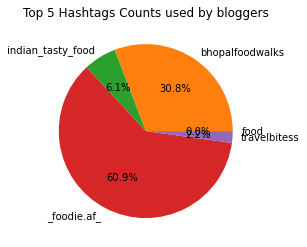

In [61]:
plt.pie(tags_used_count, labels = user_handle, autopct = "%1.1f%%")
plt.title('Top 5 Hashtags Counts used by bloggers')
plt.show()

### THIRD TASK (LIKES OF TOP 10 POSTS)

In [62]:
def average_follower_like(handle_names, driver):
    likes_per_post = {}
    follower_count = []
    for user in user_handles:
        search_user(user, driver)
        time.sleep(4)        
        
        html = driver.find_elements(By.XPATH, '//ul[contains(@class, "x78zum5 x1q0g3np xieb3on")]/li')[1].get_attribute('innerHTML')
        data = bs(html, "html.parser")
        follower_num = int(data.find('span')['title'].replace(',',""))
        follower_count.append(follower_num)
        
        WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.XPATH, '//div[contains(@class, "_ac7v  _al3n")]')))
        
        driver.find_element(By.CLASS_NAME, '_aagu').click()
        
        likes_lst = []
        
        while len(likes_lst)<10:
            try:
                likes_element = driver.find_element(By.XPATH, "//span[contains(@class, 'x193iq5w xeuugli x1fj9vlw x13faqbe x1vvkbs xt0psk2 x1i0vuye xvs91rp x1s688f x5n08af x10wh9bi x1wdrske x8viiok x18hxmgj')]")
                if "likes" in likes_element.text:
                    
                    likes_lst.append(int(likes_element.text.split('likes')[0].replace(',',"").strip()))
                    
                    WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.XPATH,
                                            '//button[contains(@class, "_abl-")]//*[@aria-label="Next"]'))).click()
                else:
                    WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.XPATH,
                                '//button[contains(@class, "_abl-")]//*[@aria-label="Next"]'))).click()
            except NoSuchElementException:
                WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.XPATH,
                                '//button[contains(@class, "_abl-")]//*[@aria-label="Next"]'))).click()
        
        likes_per_post[user] = likes_lst
        driver.back()
        driver.back()
    return likes_per_post, follower_count

In [63]:
# from selenium.common.exceptions import NoSuchElementException
# lst = []
# while len(lst)<10:
#     try:
#         likes_element = driver.find_element(By.XPATH, "//span[contains(@class, 'x193iq5w xeuugli x1fj9vlw x13faqbe x1vvkbs xt0psk2 x1i0vuye xvs91rp x1s688f x5n08af x10wh9bi x1wdrske x8viiok x18hxmgj')]")
#         if "likes" in likes_element.text:
#             lst.append(int(likes_element.text.split('likes')[0].replace(',',"").strip()))
#             WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.XPATH,
#                                     '//button[contains(@class, "_abl-")]//*[@aria-label="Next"]'))).click()
#         else:
#             WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.XPATH,
#                         '//button[contains(@class, "_abl-")]//*[@aria-label="Next"]'))).click()
#     except NoSuchElementException:
#         WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.XPATH,
#                         '//button[contains(@class, "_abl-")]//*[@aria-label="Next"]'))).click()
# driver.back()
# driver.back()
# print(lst)

In [69]:
user_handles = list(followers_count.keys())
user_likes, follower_count = average_follower_like(user_handles, driver)

In [70]:
user_likes

{'food': [85, 291, 512, 212, 181, 841, 220, 378, 884, 470],
 'bhopalfoodwalks': [3364, 125, 2117, 784, 230, 359, 354, 1044, 569, 1199],
 'indian_tasty_food': [255, 180, 245, 197, 274, 191, 380, 235, 165, 34],
 '_foodie.af_': [1490, 4386, 204, 934, 402, 1547, 477, 2178, 889, 429],
 'travelbitess': [296, 423, 190, 10701, 650, 296, 240, 1076, 310, 12260]}

In [71]:
average_likes_handle = {}
for user in user_likes.keys():
    average_likes_handle[user] = sum(user_likes[user])//10
average_likes_handle

{'food': 407,
 'bhopalfoodwalks': 1014,
 'indian_tasty_food': 215,
 '_foodie.af_': 1293,
 'travelbitess': 2644}

In [72]:
average_likes_follower = {}
for user, f_count in zip(average_likes_handle.keys(), follower_count):
    average_likes_follower[user] = f_count//average_likes_handle[user]

In [73]:
average_likes_follower

{'food': 448,
 'bhopalfoodwalks': 29,
 'indian_tasty_food': 87,
 '_foodie.af_': 11,
 'travelbitess': 4}

#### Plotting the above gathered information in bar chart( average likes of handles)

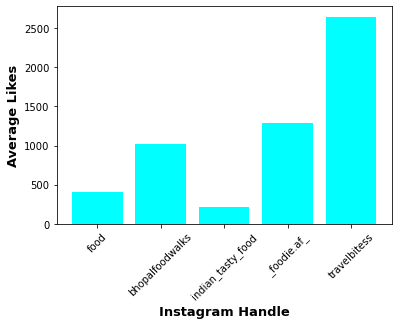

In [75]:
user_handle = list(average_likes_handle.keys())
avg_likes = list(average_likes_handle.values())
plt.bar(user_handle, avg_likes, color = 'cyan')
plt.xticks(rotation = 45)
plt.xlabel("Instagram Handle",fontweight = "bold", size = 13)
plt.ylabel("Average Likes", fontweight = "bold", size = 13)
plt.show()

#### Plotting the above gathered information in bar chart( Followers : Likes ratio )

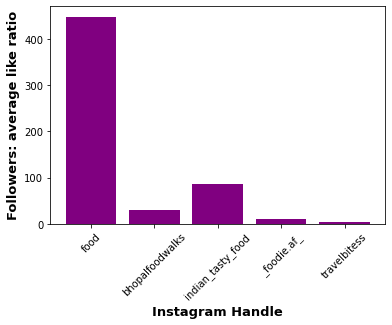

In [76]:
user_handle = list(average_likes_follower.keys())
avg_likes = list(average_likes_follower.values())
plt.bar(user_handle, avg_likes, color = 'purple')
plt.xticks(rotation = 45)
plt.xlabel("Instagram Handle",fontweight = "bold", size = 13)
plt.ylabel("Followers: average like ratio", fontweight = "bold", size = 13)
plt.show()